In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
train_df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data 
we have only to consider the bedrooms, bathrooms and the area of the house.
so we will only have the following columns-<br>
totalarea = GrLivArea + TotalBSMTSF<br>
BedroomAbvGr<br>
FullBath+HalfBath (renamed to bathrooms)



In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Plotting and Analysing


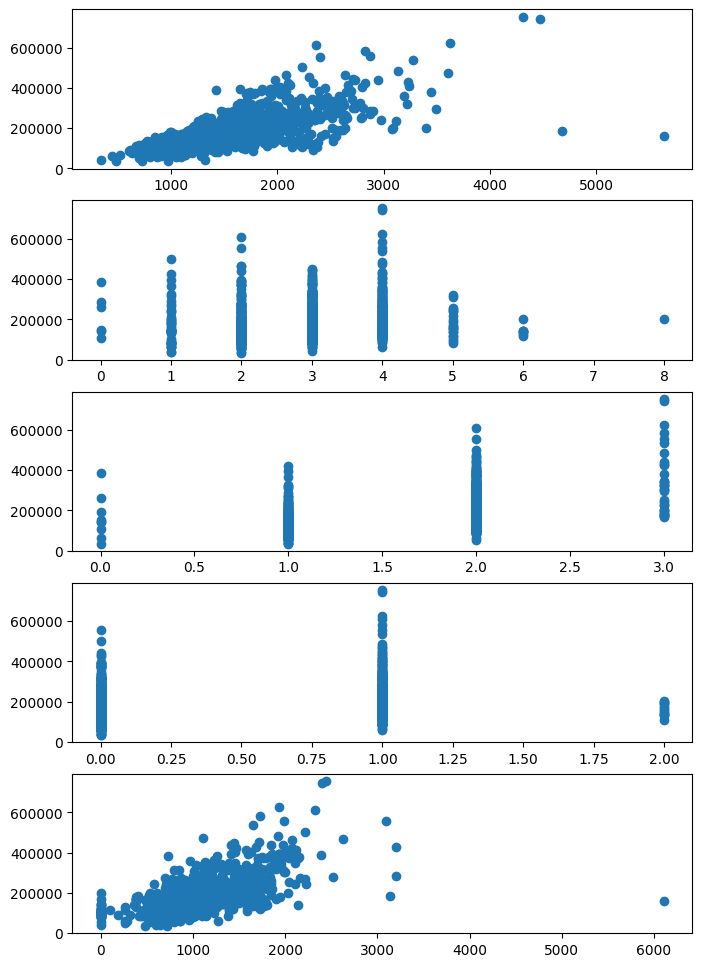

In [8]:
fig, axs = plt.subplots(5, 1, figsize=(8, 12))

axs[0].scatter('GrLivArea', 'SalePrice', data = train_df)
axs[1].scatter('BedroomAbvGr','SalePrice', data = train_df)
axs[2].scatter('FullBath', 'SalePrice', data = train_df)
axs[3].scatter('HalfBath','SalePrice',data = train_df)
axs[4].scatter('TotalBsmtSF', 'SalePrice', data = train_df)
plt.show()

In [9]:
train_df.query('LotArea > 55000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [10]:
train_df.query('BedroomAbvGr > 6')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [11]:
train_df.query('TotalBsmtSF > 3000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [12]:
train_df.query( 'GrLivArea > 4000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [13]:
values = [250,314,336,452,707,1299,1397,636]

In [14]:
train_df = train_df[train_df.Id.isin([441,333,497,524,692,1183])== False]

In [15]:
train_df = train_df[train_df.Id.isin(values)== False]

## Feature Engineering


In [16]:
train_df.loc[:, 'totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']


In [17]:
test_df.loc[:, 'totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']


In [18]:
train_df.loc[:, 'bathroom'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5*(train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df.loc[:, 'bathroom'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5*(test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [19]:
test_df.query('totalarea.isnull()')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,totalarea,bathroom
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN,NaN


In [20]:
test_df.query('bathroom.isnull()')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,totalarea,bathroom
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN,NaN
728,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2008,WD,Normal,3820.0,NaN


In [21]:
test_df = test_df[test_df.Id.isin([2121,2189])== False]

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1457 non-null   int64  
 1   MSSubClass     1457 non-null   int64  
 2   MSZoning       1453 non-null   object 
 3   LotFrontage    1230 non-null   float64
 4   LotArea        1457 non-null   int64  
 5   Street         1457 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1457 non-null   object 
 8   LandContour    1457 non-null   object 
 9   Utilities      1455 non-null   object 
 10  LotConfig      1457 non-null   object 
 11  LandSlope      1457 non-null   object 
 12  Neighborhood   1457 non-null   object 
 13  Condition1     1457 non-null   object 
 14  Condition2     1457 non-null   object 
 15  BldgType       1457 non-null   object 
 16  HouseStyle     1457 non-null   object 
 17  OverallQual    1457 non-null   int64  
 18  OverallCond  

Training and testing data 

In [23]:
X = train_df[['BedroomAbvGr','bathroom','totalarea']]
y = train_df['SalePrice']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Training the Model

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)

## Predicting Result

In [56]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)

Model Coefficients: [-15803.56796883  21193.08204924     74.98914499]
Model Intercept: -13405.163937994716
Mean Squared Error: 1327198859.9845657


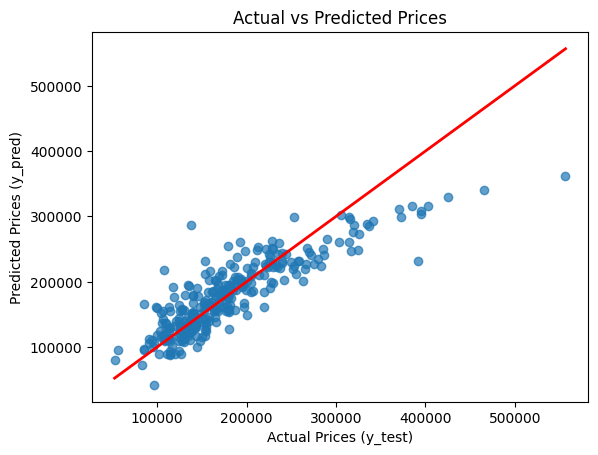

In [57]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title("Actual vs Predicted Prices")
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 25765.446359923288


In [59]:
def calculate_mape(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mape

# Example
mape = calculate_mape(y_test, y_pred)
accuracy = 100 - mape
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 85.03%


In [70]:
model.predict([[3,3,1300]])

/Users/devesh/Desktop/Venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([100249.26679246])

## Tranforming the model then Training the model 

In [60]:
from sklearn.preprocessing import StandardScaler
model2 = LinearRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model2.fit(X_train_scaled, y_train)

LinearRegression()

## Predicting the model

In [61]:
y_pred = model2.predict(X_test_scaled)

In [62]:
mse = mean_squared_error(y_test, y_pred)

In [63]:
print("Model Coefficients:", model2.coef_)
print("Model Intercept:", model2.intercept_)
print("Mean Squared Error:", mse)

Model Coefficients: [-12935.91427454  16643.56915562  57226.65978582]
Model Intercept: 178870.2301038062
Mean Squared Error: 1327198859.9848387


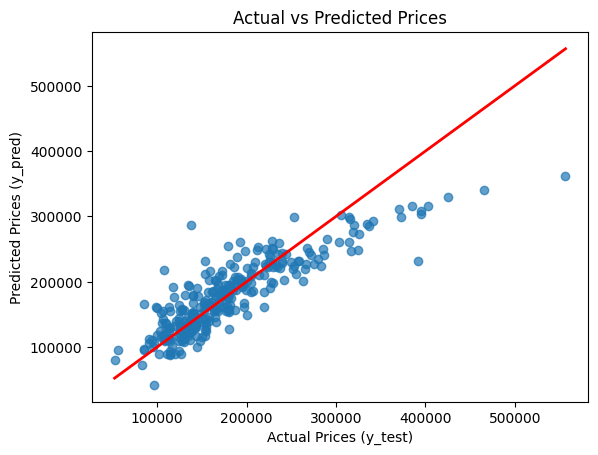

In [64]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title("Actual vs Predicted Prices")
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 25765.44635992425


In [66]:
def calculate_mape(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return mape

# Example
mape = calculate_mape(y_test, y_pred)
accuracy = 100 - mape
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 85.03%


# Result
<br>
Reached the accuracy of 85.03%